# Week 6 Deliverable: Neural Network
The purpose of this is to create and implement a Neural Network modeling approach, including training and validation of the model. 

In [ ]:
from _Setup import *
from _Functions import *

Installing dependencies from requirements.txt...
All dependencies installed successfully.


## TODO : Split data using Time Series Cross Validation
This step shall be performed as it was depicted in the Week 1 Report and in the Hyndman book

In [2]:
# Load data as csv
sector_train = pd.read_csv(sector_data_csv_path_train_pivoted, index_col='Area of Responsibility')

# Import the scaler
with open(scalers_file, "rb") as file:
    scalers = pickle.load(file)

# DONE : Create scaled version of original Dataframe
# Apply pre-trained scalers row-wise

# Create an empty DataFrame to store scaled values
sector_train_scaled = pd.DataFrame(index=sector_train.index, columns=sector_train.columns)

# Apply each pre-trained scaler row-wise
for index, row in sector_train.iterrows():
	scaler = scalers[index]
	scaled_row = scaler.transform(row.values.reshape(-1, 1)).flatten()
	sector_train_scaled.loc[index] = scaled_row

In [ ]:
# DONE : Create a process to windowize the data for cross-validation split
def validation_split(data, train_size = 12, validation_size = 12):
    """Input : Dataframe , Output : Array of Input"""
    """TODO : This may need to be converted to tensors"""

    train_input, validation_input = [], []

    for index, row in data.iterrows():
        split_index = train_size

        start = split_index - train_size
        end = split_index + validation_size

        train_set, validation_set = [], []

        while end <= len(row):
            train = row[start:split_index]
            val = row[split_index:end]

            train_set.append(train.values)
            validation_set.append(val.values)

            split_index += 1
            start = split_index - train_size
            end = split_index + validation_size

        train_input.append(train_set)
        validation_input.append(validation_set)

    return train_input, validation_input

In [116]:
input_size = 24
train_data, val_data = validation_split(sector_train_scaled, train_size=input_size)

In [ ]:
val_data

In [117]:
# Import Test data
test_data = pd.read_csv(sector_data_csv_path_test_pivoted, index_col='Area of Responsibility')

In [118]:
# Function for MAPE, probably something predefined but here for ease of use
def mean_absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true) * 100

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.2577 - val_loss: 0.2427
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2364 - val_loss: 0.2292
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2322 - val_loss: 0.2166
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2194 - val_loss: 0.2049
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2067 - val_loss: 0.1937
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1957 - val_loss: 0.1832
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1742 - val_loss: 0.1733
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1795 - val_loss: 0.1636
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1664 - val_loss: 0.1544
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1644 - val_loss: 0.1456
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1465 - val_loss: 0.1369
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1335 - val_loss: 0.1285


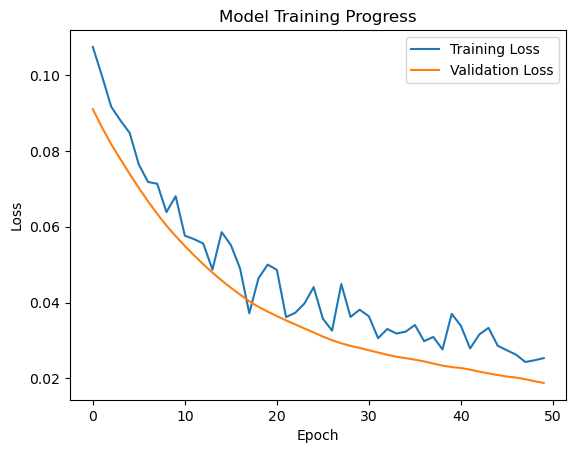

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


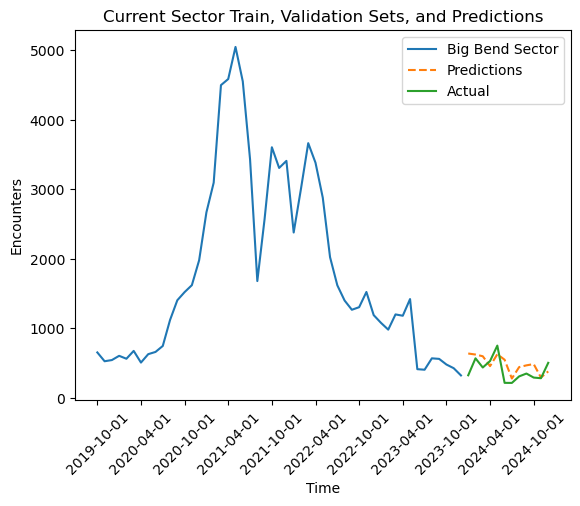

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.1249 - val_loss: 0.1184
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1140 - val_loss: 0.1162
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1044 - val_loss: 0.1140
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1129 - val_loss: 0.1119
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1117 - val_loss: 0.1097
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1087 - val_loss: 0.1077
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1111 - val_loss: 0.1056
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1106 - val_loss: 0.1036
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1063 - val_loss: 0.1015
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1018 - val_loss: 0.0994
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0969 - val_loss: 0.0972
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0885 - val_loss: 0.0949


In [134]:
sector_MAPEs = pd.DataFrame(index=test_data.index, columns=test_data.columns)
sector_predictions = pd.DataFrame(index=test_data.index, columns=test_data.columns)


for index in sector_train_scaled.index:
    
    index_integer = sector_train_scaled.index.get_loc(index)

    # Convert the first index of train_data and val_data to numpy arrays
    split_index = 25
    
    train_data_np = np.array(train_data[index_integer][:split_index])
    train_data_y_np = np.array(val_data[index_integer][:split_index])
    
    val_data_np = np.array(train_data[index_integer][:split_index])
    val_data_y_np = np.array(val_data[index_integer][:split_index])

    # Reshape the data to fit the model's input requirements
    # Assuming the model expects input shape (batch_size, input_size)
    train_data_np = train_data_np.reshape(-1, input_size)
    train_data_y_np = train_data_y_np.reshape(-1, 12)
    
    val_data_np = val_data_np.reshape(-1, input_size)
    val_data_y_np = val_data_y_np.reshape(-1, 12)
    
    # Convert numpy arrays to tensors
    train_data_tensor = tf.convert_to_tensor(train_data_np, dtype=tf.float32)
    train_data_y_tensor = tf.convert_to_tensor(train_data_y_np , dtype=tf.float32)
    val_data_tensor = tf.convert_to_tensor(val_data_np, dtype=tf.float32)
    val_data_y_tensor = tf.convert_to_tensor(val_data_y_np, dtype=tf.float32)

    optimizer = Adam(learning_rate=0.0001)

 #   # Define the neural network model
 #   nn_model = Sequential()
 #   nn_model.add(InputLayer(shape=(input_size,)))
 #   nn_model.add(Dense(units=24))
 #   nn_model.add(Dropout(0.3))
 #   nn_model.add(Dense(units=512, activation='relu'))
 #   nn_model.add(Dropout(0.3))
 #   nn_model.add(Dense(units=256, activation='relu'))
 #   nn_model.add(Dropout(0.3))
 #   nn_model.add(Dense(units=128, activation='relu'))
 #   nn_model.add(Dense(units=12, activation='linear'))
#
 #   nn_model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    nn_model = Sequential()
    nn_model.add(InputLayer(shape=(input_size,)))
    nn_model.add(Dense(units=24))
    nn_model.add(Dropout(0.3))
    nn_model.add(Dense(units=512, activation='relu'))
    nn_model.add(Dropout(0.3))
    nn_model.add(Dense(units=256, activation='relu'))
    nn_model.add(Dropout(0.3))
    nn_model.add(Dense(units=128, activation='relu'))
    nn_model.add(Dense(units=12, activation='linear'))  # Adjust the output layer to match the target shape

    nn_model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    train_progress = nn_model.fit(train_data_tensor, train_data_y_tensor, epochs=50, batch_size=12, validation_data=(val_data_tensor, val_data_y_tensor))

    if index == 'Big Bend Sector':
        # Plot the training loss
        plt.plot(train_progress.history['loss'])
        plt.plot(train_progress.history['val_loss'])
        plt.title('Model Training Progress')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
        plt.show()

    test_input = np.array(sector_train_scaled.iloc[index_integer][-input_size:]).reshape(-1, input_size)

    test_input_tensor = tf.convert_to_tensor(test_input, dtype=tf.float32)

    predictions = nn_model.predict(test_input_tensor)

    current_sector_train = sector_train.loc[index]
    current_sector_actual = test_data.loc[index]
    predictions = scalers[index].inverse_transform(predictions)

    # Plot the current_sector_train data
    if index == 'Big Bend Sector':
        plt.plot(current_sector_train.values, label=index)

        # Plot the predictions data
        plt.plot(range(len(current_sector_train), len(current_sector_train) + len(predictions.flatten())), predictions.flatten(), label='Predictions', linestyle='--')

        # Plot the predictions data
        plt.plot(range(len(current_sector_train), len(current_sector_train) + len(predictions.flatten())), current_sector_actual.values, label='Actual')

        # Set the x-values as dates from the train and test sequences
        dates = list(sector_train.columns) + list(test_data.columns)

        plt.title('Current Sector Train, Validation Sets, and Predictions')
        plt.xlabel('Time')
        plt.ylabel('Encounters')
        plt.xticks(ticks=range(0, len(dates), 6), labels=dates[::6], rotation=45)
        plt.legend()
        plt.show()

    # Calculate MAPE for each time step
    mape_by_time_step = mean_absolute_percentage_error(current_sector_actual.values, predictions.flatten())

    sector_MAPEs.loc[index] = mape_by_time_step
    sector_predictions.loc[index] = predictions



In [ ]:
sector_MAPEs

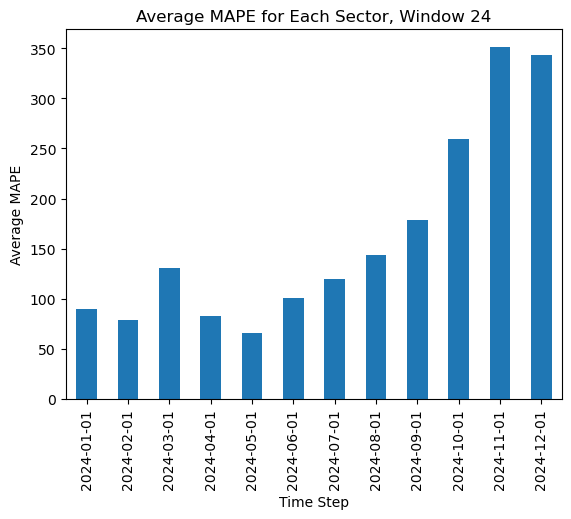

In [137]:
# Calculate the average MAPE for each column
average_MAPE = sector_MAPEs.mean()

# Plot the average MAPE for each column
average_MAPE.plot(kind='bar')
plt.title('Average MAPE for Each Sector, Window 24')
plt.xlabel('Time Step')
plt.ylabel('Average MAPE')
plt.show()